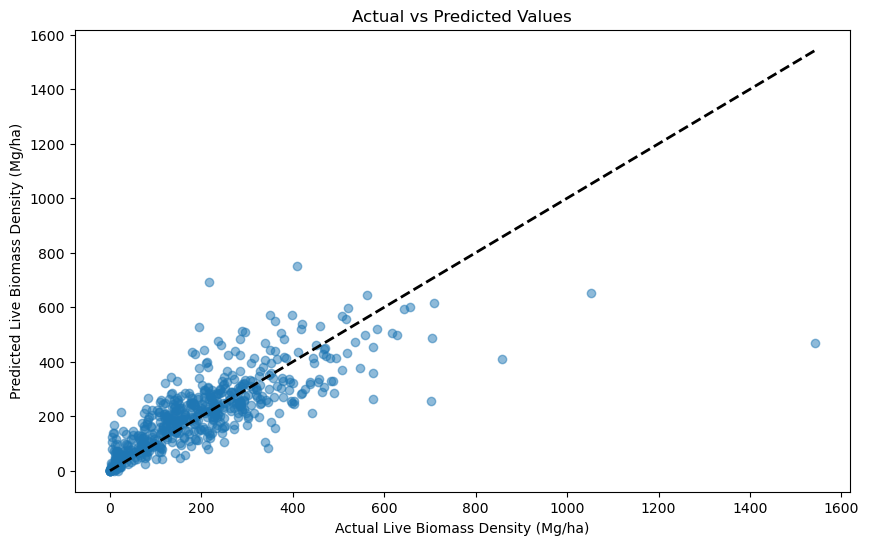

In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"")

# Prepare the data
X = data[['RH10', 'RH20', 'RH25', 'RH30', 'RH40', 'RH50', 'RH60','RH70', 'RH75', 'RH80', 'RH90', 'RH95', 'RH98']]  # predictors
y = data['Live_Biomass_Density']  # target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the trained model
y_pred_rf = rf_model.predict(X_test)

# Visualize actual vs predicted values for the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Live Biomass Density (Mg/ha)')
plt.ylabel('Predicted Live Biomass Density (Mg/ha)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

In [3]:
# Calculate Mean Absolute Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)
# Calculate RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
# Calculate the average of actual values
average_actual_rf = np.mean(y_test)
# Calculate Percentage RMSE
percentage_rmse_rf = (rmse_rf / average_actual_rf) * 100


# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae_rf:.2f} Mg/ha')
print(f'R-squared (R²): {r2_rf:.2f}')
print(f'Percentage RMSE: {percentage_rmse_rf:.2f}%')
print(f'Number of samples in the training set: {X_train.shape[0]}')

Mean Absolute Error (MAE): 64.38 Mg/ha
R-squared (R²): 0.60
Percentage RMSE: 51.10%
Number of samples in the training set: 2358
